In [1]:
%matplotlib inline

# Compute interaction matrix

This example shows how to compute the interaction matrix.

The interaction matrix quantifies the number of edges that nodes
belonging to a given annotation shares with the other annotations. It\'s
a descriptive statistics of the spatial graph.

::: seealso
See `sphx_glr_auto_examples_graph_compute_spatial_neighbors.py` for
general usage of `squidpy.gr.spatial_neighbors`.
:::


In [2]:
import squidpy as sq

adata = sq.datasets.imc()
adata

AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

First, we need to compute a connectivity matrix from spatial
coordinates. We can use `squidpy.gr.spatial_neighbors` for this purpose.


In [3]:
sq.gr.spatial_neighbors(adata)

We can compute the interaction matrix with
`squidpy.gr.interaction_matrix`. Specify `normalized = True` if you want
a row-normalized matrix. Results can be visualized with
`squidpy.pl.interaction_matrix`.


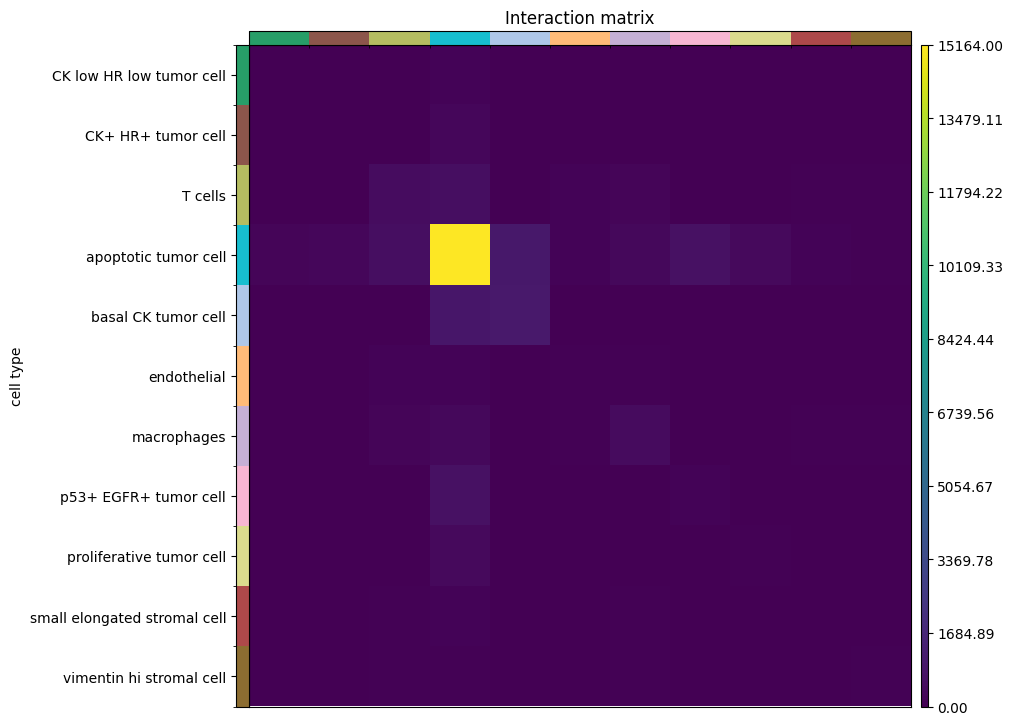

In [4]:
sq.gr.interaction_matrix(adata, cluster_key="cell type")
sq.pl.interaction_matrix(adata, cluster_key="cell type")

> IDF: normalized interaction matrix

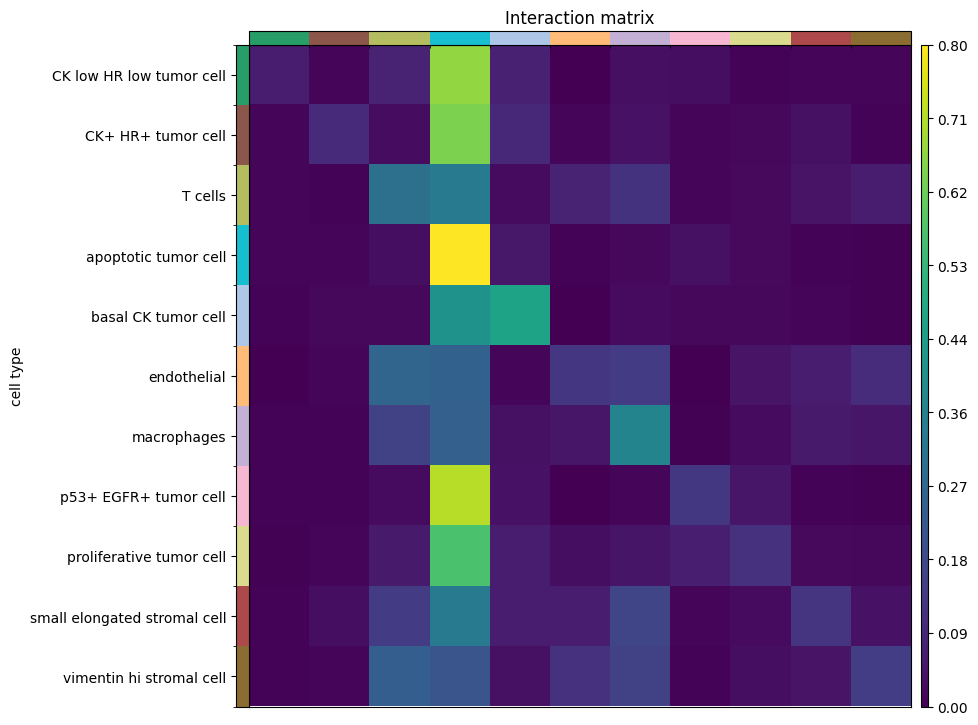

In [7]:
sq.gr.interaction_matrix(adata, cluster_key='cell type', normalized=True)
sq.pl.interaction_matrix(adata, cluster_key='cell type')

> IDF: What is a better descriptive statistic? Cluster inteaction raw number or normalized with respect to all cell types?
> I argue that normalized is more informative since we are trying to elucidate interactions within the tumor microenvironment and all cells within it exert an effect. However, raw counts gives the perspective of count number, an absolute metric of interactions which is also exclusively informative. Proportional cell counts matter in the absolute counts though.
In the current, as you might see, the absolute count clearly shows distinctive apoptotic tumor cell interactions with itself. This is informative only in the context of knowing that the proportional number of these cells are very high with respect to others. Hence, the normalized matrix may make more sense. In that case one can observer, that all cells share high amount of normalized interactions the apoptotic tumor cells, further substatiating the fact, that they are uniformly dispersed throughout the sample and with a high number.

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


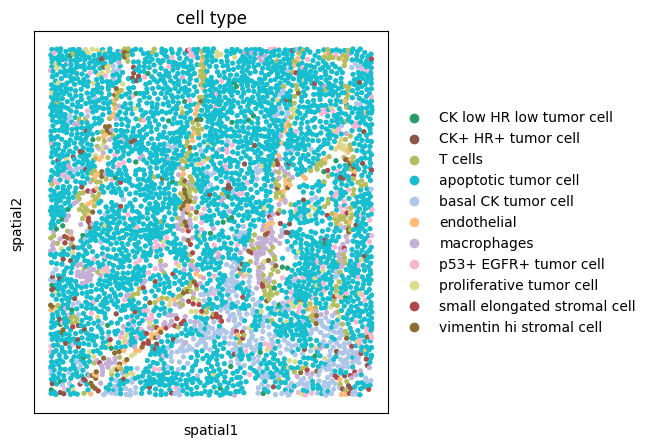

In [9]:
sq.pl.spatial_scatter(adata, shape=None, color='cell type')